In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor
from sklearn.preprocessing import LabelEncoder, RobustScaler
from xgboost import XGBRegressor

In [21]:
df_train = pd.read_csv('Performa_Siswa_Anime(Train).csv')
df_train.head()

,Nama,Jam_Belajar,Kehadiran,Keterlibatan_Orangtua,Akses_ke_Sumber_Daya,Kegiatan_Ekstrakurikuler,Jam_Tidur,Nilai_Sebelumnya,Tingkat_Motivasi,Akses_Internet,Sesi_Bimbingan,Pendapatan_Keluarga,Kualitas_Guru,Jenis_Sekolah,Pengaruh_Teman,Aktivitas_Fisik,Kesulitan_Belajar,Tingkat_Pendidikan_Orangtua,Jarak_dari_Rumah,Nilai_Ujian
0,Elner,NaN,84.0,Low,High,No,7.0,NaN,Low,Yes,0,NaN,Medium,Public,Positive,3,No,High School,Near,67
1,Male Staff,19.0,NaN,Low,Medium,No,8.0,NaN,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,61
2,Bangai ROGIRI,24.0,98.0,Medium,Medium,Yes,7.0,NaN,Medium,Yes,2,NaN,Medium,Public,Neutral,4,No,Postgraduate,Near,74
3,Pakkun,29.0,89.0,Low,Medium,Yes,8.0,98.0,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,71
4,Cole MOZELEEMAY,NaN,92.0,Medium,Medium,Yes,6.0,65.0,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,70


In [22]:
df_test = pd.read_csv('Performa_Siswa_Anime(Test).csv')
df_test.head()

,Nama,Jam_Belajar,Kehadiran,Keterlibatan_Orangtua,Akses_ke_Sumber_Daya,Kegiatan_Ekstrakurikuler,Jam_Tidur,Nilai_Sebelumnya,Tingkat_Motivasi,Akses_Internet,Sesi_Bimbingan,Pendapatan_Keluarga,Kualitas_Guru,Jenis_Sekolah,Pengaruh_Teman,Aktivitas_Fisik,Kesulitan_Belajar,Tingkat_Pendidikan_Orangtua,Jarak_dari_Rumah
0,Ouzen (オーゼン),20.0,77,Medium,High,Yes,7,53,Medium,Yes,1,Low,Medium,Public,Positive,4,No,High School,Near
1,"Yuigahama, Yui (由比ヶ浜 結衣)",28.0,95,Medium,Medium,Yes,8,80,Medium,Yes,0,NaN,Medium,Private,Negative,2,No,High School,Moderate
2,Hiei (飛影),21.0,85,Medium,High,Yes,5,53,Medium,Yes,2,Low,Medium,Private,Neutral,3,No,College,Near
3,Dabi (荼毘),16.0,87,High,Medium,Yes,7,79,Medium,Yes,1,Low,Medium,Public,Neutral,4,No,Postgraduate,Moderate
4,"Nikiforov, Victor (ヴィクトル・ニキフォロフ)",24.0,80,High,Medium,Yes,7,72,Medium,No,2,Medium,Medium,Public,Neutral,3,No,High School,Near


In [23]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6378 entries, 0 to 6377
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Nama                         6378 non-null   object 
 1   Jam_Belajar                  5424 non-null   float64
 2   Kehadiran                    5791 non-null   float64
 3   Keterlibatan_Orangtua        6030 non-null   object 
 4   Akses_ke_Sumber_Daya         6254 non-null   object 
 5   Kegiatan_Ekstrakurikuler     6378 non-null   object 
 6   Jam_Tidur                    6104 non-null   float64
 7   Nilai_Sebelumnya             3764 non-null   float64
 8   Tingkat_Motivasi             6378 non-null   object 
 9   Akses_Internet               6324 non-null   object 
 10  Sesi_Bimbingan               6378 non-null   int64  
 11  Pendapatan_Keluarga          4274 non-null   object 
 12  Kualitas_Guru                5537 non-null   object 
 13  Jenis_Sekolah     

In [24]:
df_train.isnull().sum()

Nama                              0
Jam_Belajar                     954
Kehadiran                       587
Keterlibatan_Orangtua           348
Akses_ke_Sumber_Daya            124
Kegiatan_Ekstrakurikuler          0
Jam_Tidur                       274
Nilai_Sebelumnya               2614
Tingkat_Motivasi                  0
Akses_Internet                   54
Sesi_Bimbingan                    0
Pendapatan_Keluarga            2104
Kualitas_Guru                   841
Jenis_Sekolah                     0
Pengaruh_Teman                    0
Aktivitas_Fisik                   0
Kesulitan_Belajar               786
Tingkat_Pendidikan_Orangtua     119
Jarak_dari_Rumah                  0
Nilai_Ujian                       0
dtype: int64

In [25]:
df_train.nunique()

Nama                           6378
Jam_Belajar                      40
Kehadiran                        41
Keterlibatan_Orangtua             3
Akses_ke_Sumber_Daya              3
Kegiatan_Ekstrakurikuler          2
Jam_Tidur                         7
Nilai_Sebelumnya                 51
Tingkat_Motivasi                  3
Akses_Internet                    2
Sesi_Bimbingan                    9
Pendapatan_Keluarga               3
Kualitas_Guru                     3
Jenis_Sekolah                     2
Pengaruh_Teman                    3
Aktivitas_Fisik                   7
Kesulitan_Belajar                 2
Tingkat_Pendidikan_Orangtua       3
Jarak_dari_Rumah                  3
Nilai_Ujian                      45
dtype: int64

In [26]:
hasil_nama = df_test['Nama']
train_nilai = df_train['Nilai_Ujian']
df_train = df_train.drop(columns=['Nama', 'Nilai_Sebelumnya', 'Pendapatan_Keluarga', 'Nilai_Ujian'])
df_test = df_test.drop(columns=['Nama', 'Nilai_Sebelumnya', 'Pendapatan_Keluarga'])

In [27]:
for col in df_train.select_dtypes(include=['object']).columns:
    label_encoder = LabelEncoder()
    non_null_values = df_train[col].dropna().unique()
    label_encoder.fit(non_null_values)
    
    df_train[col] = df_train[col].apply(lambda x: label_encoder.transform([x])[0] if pd.notnull(x) else np.nan)
    df_test[col] = df_test[col].apply(lambda x: label_encoder.transform([x])[0] if pd.notnull(x) else np.nan)
    

In [ ]:
imputer = IterativeImputer(estimator=AdaBoostRegressor(), max_iter=100, random_state=0)
df_train_imputed = pd.DataFrame(imputer.fit_transform(df_train), columns=df_train.columns)
df_train_imputed = df_train_imputed.astype(df_train.dtypes)

df_test_imputed = pd.DataFrame(imputer.transform(df_test), columns=df_test.columns)
df_test_imputed = df_test_imputed.astype(df_test.dtypes)

C:\Users\Lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\impute\_iterative.py:825: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [29]:
df_train_imputed['Nilai'] = train_nilai

In [30]:
df_train_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6378 entries, 0 to 6377
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Jam_Belajar                  6378 non-null   float64
 1   Kehadiran                    6378 non-null   float64
 2   Keterlibatan_Orangtua        6378 non-null   float64
 3   Akses_ke_Sumber_Daya         6378 non-null   float64
 4   Kegiatan_Ekstrakurikuler     6378 non-null   int32  
 5   Jam_Tidur                    6378 non-null   float64
 6   Tingkat_Motivasi             6378 non-null   int32  
 7   Akses_Internet               6378 non-null   float64
 8   Sesi_Bimbingan               6378 non-null   int64  
 9   Kualitas_Guru                6378 non-null   float64
 10  Jenis_Sekolah                6378 non-null   int32  
 11  Pengaruh_Teman               6378 non-null   int32  
 12  Aktivitas_Fisik              6378 non-null   int64  
 13  Kesulitan_Belajar 

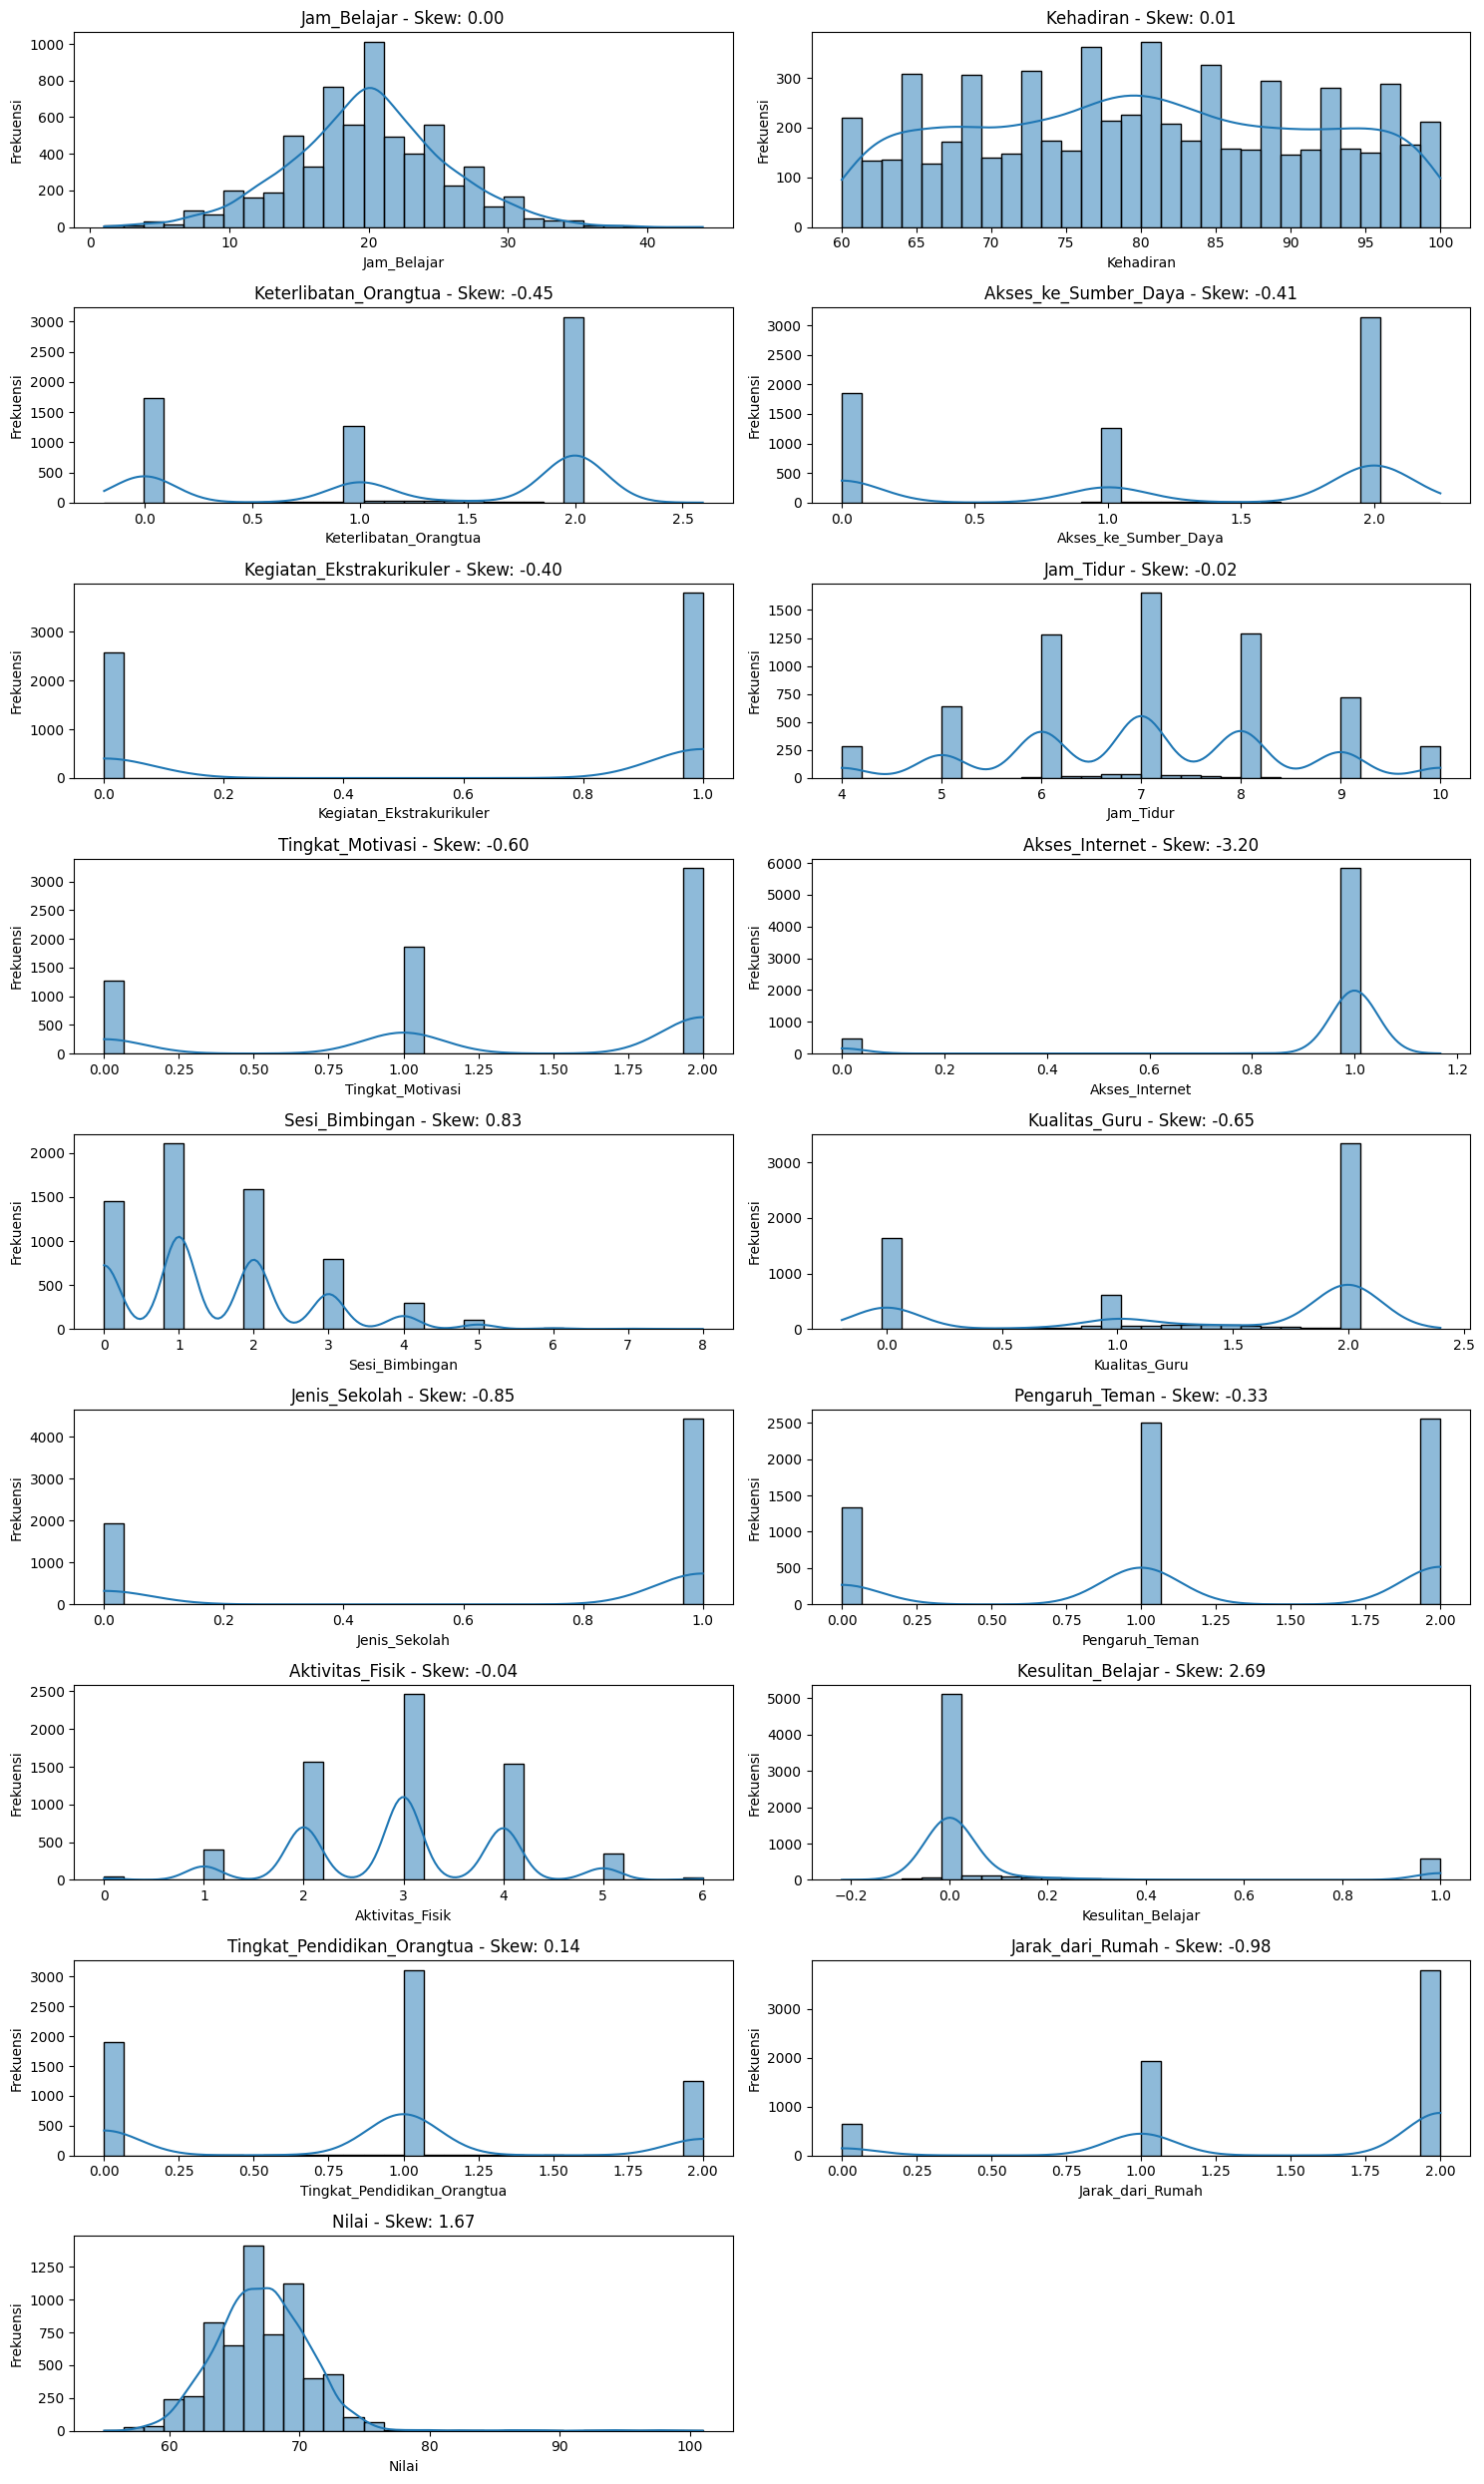

In [31]:
skewness = df_train_imputed.skew()

plt.figure(figsize=(15, 25))

for i, column in enumerate(df_train_imputed.select_dtypes(include=['int32', 'float64', 'int64']).columns):
    plt.subplot(9, 2, i + 1) 
    sns.histplot(df_train_imputed[column], kde=True, bins=30)  # Histogram dengan density plot
    plt.title(f"{column} - Skew: {skewness[column]:.2f}")
    plt.xlabel(column)
    plt.ylabel('Frekuensi')

plt.tight_layout()
plt.show()

In [32]:
df_train_imputed = df_train_imputed.drop(columns=['Nilai'])

scaler = RobustScaler()

df_train_scaled = scaler.fit_transform(df_train_imputed)
df_test_scaled = scaler.transform(df_test_imputed)

In [ ]:
rfr = RandomForestRegressor()
rfr.fit(df_train_scaled, train_nilai)
y_pred = rfr.predict(df_test_scaled)

hasil = {}
hasil = pd.DataFrame(hasil)
hasil['Nama'] = hasil_nama
hasil['Nilai_Ujian'] = y_pred
hasil.to_csv('rfr.csv', index= False)

In [34]:
adb = AdaBoostRegressor()
adb.fit(df_train_scaled, train_nilai)
y_pred = adb.predict(df_test_scaled)
hasil['Nama'] = hasil_nama
hasil['Nilai_Ujian'] = y_pred
hasil.to_csv('adb.csv', index= False)

In [35]:
xgb = XGBRegressor()
xgb.fit(df_train_scaled, train_nilai)
y_pred = xgb.predict(df_test_scaled)
hasil['Nama'] = hasil_nama
hasil['Nilai_Ujian'] = y_pred
hasil.to_csv('xgb.csv', index= False)